In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#data-new
df_new = pd.read_csv('drive/MyDrive/Data/data-new.csv')
df_1 = pd.read_csv('drive/MyDrive/Data/dataset-2.csv')
df_2 = pd.read_csv('drive/MyDrive/Data/dataset-1.csv')
#data-new-mois
df_new_mois = pd.read_csv('drive/MyDrive/Data/data-new-mois.csv')
#data_1minggu
df_27mei = pd.read_csv('drive/MyDrive/Data/data-1-minggu.csv')

In [4]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [5]:
# Inisialisasi koneksi Firebase
cred = credentials.Certificate("drive/MyDrive/Data/privat_key.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://npk-monitoring-0518-default-rtdb.asia-southeast1.firebasedatabase.app'
})

# Dapatkan referensi ke database Firebase
ref = db.reference('/')


In [6]:
data = ref.child('UsersData/FQa7cD7I8uY9PO0QdAB0yUWMk2j1/databaru').get()

In [7]:
import pandas as pd

# Membuat dataframe dari data
df = pd.DataFrame.from_dict(data, orient='index')
# Menyesuaikan kolom dan baris jika diperlukan
# df = df.rename(columns={'old_column_name': 'new_column_name'})
# df = df.transpose()

In [8]:
# Mengubah kolom 'col1' menjadi float
df['k'] = df['k'].astype(float)
df['n'] = df['n'].astype(float)
df['p'] = df['p'].astype(float)
df['ph'] = df['ph'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df['moisture'] = df['moisture'].astype(float)
df['Temperature'] = df['Temperature'].astype(float)

# Mengubah kolom 'col2' menjadi datetime64
#df['n'] = pd.to_datetime(df['n'])

In [9]:
from datetime import datetime
import pytz

# Mendefinisikan format datetime yang sesuai dengan format timestamp
format_str = "%Y-%m-%dT%H:%M:%S"

# Mengubah setiap elemen dalam Series menjadi objek datetime dengan menggunakan format yang sudah didefinisikan
data = df.Timestamp.apply(lambda x: datetime.strptime(x, format_str))

# Menentukan timezone WIB menggunakan library pytz
#timezone_str = "Asia/Jakarta"
#timezone_obj = pytz.timezone(timezone_str)

# Mengubah timezone dari setiap elemen objek datetime sesuai dengan timezone yang sudah ditentukan
# date_time = data.apply(lambda x: timezone_obj.localize(x))

In [10]:
df['Timestamp'] = data
#df['Timestamp] = date_time

In [11]:
# Mengatur kolom "Timestamp" sebagai indeks DataFrame
df.set_index('Timestamp', inplace=True)

# Pembersihan data NaN PErtama

In [13]:
#Check nilai NaN
df.isna().sum()

Humidity       722
Temperature    722
jam              0
k                0
moisture         0
n                0
p                0
ph               0
tamp             0
dtype: int64

In [12]:
# Menghapus baris yang mengandung NaN pada kolom 'col1'
df = df.dropna(subset=['Humidity'])

In [12]:
# Menghilangkan tiga kolom
columns_to_drop = ['Temperature', 'Humidity', 'jam']
df = df.drop(columns=columns_to_drop)

# Deteksi nilai 0

In [13]:
import math
# Mendeteksi nilai float 0.0 menggunakan math.isnan()
mask = df['moisture'].apply(lambda x: math.isnan(x) or x == 0.0)

# Menampilkan baris yang memiliki nilai float 0.0
result = df[mask]
print(result)

                         k  moisture      n      p    ph        tamp
Timestamp                                                           
2023-05-30 14:33:00  300.0       0.0  200.0  200.0  4.27  1685432035
2023-05-30 14:39:00  300.0       0.0  200.0  200.0  4.27  1685432395
2023-05-30 14:45:00  300.0       0.0  200.0  200.0  4.27  1685432756
2023-05-30 14:51:00  300.0       0.0  200.0  200.0  4.27  1685433116
2023-05-30 14:57:00  300.0       0.0  200.0  200.0  4.27  1685433476
2023-05-30 15:03:00  300.0       0.0  200.0  200.0  4.27  1685433837
2023-05-30 15:09:00  300.0       0.0  200.0  200.0  4.27  1685434198
2023-05-30 15:15:00  300.0       0.0  200.0  200.0  4.27  1685434559
2023-05-30 15:21:00  300.0       0.0  200.0  200.0  4.27  1685434919
2036-02-07 13:28:00  300.0       0.0  200.0  200.0  4.27  1685435280
2023-05-30 15:33:00  300.0       0.0  200.0  200.0  4.27  1685435641
2023-05-30 15:39:00  300.0       0.0  200.0  200.0  4.27  1685436001
2023-05-30 15:46:00  300.0       0

In [14]:
import pandas as pd
# Menghapus baris dengan nilai float 0.0
df = df[(df != 0.0).all(axis=1)]

# Pembersihan tahun timestamp yang error

In [15]:
# Menghapus baris dengan timestamp di bawah tahun 2020
df_filtered_down = df[df.index.year > 2022]
df_filtered_up = df_filtered_down[df_filtered_down.index.year < 2025]

# Menampilkan DataFrame setelah penghapusan
df = df_filtered_up
print(df_filtered_up)

                         k  moisture      n      p    ph        tamp
Timestamp                                                           
2023-06-06 07:12:00  220.0     100.0  108.0  183.0  5.79           0
2023-05-30 14:29:00  190.0      94.0   81.0  137.0  6.21  1685431787
2023-05-30 16:33:00  152.0      96.0   47.0   80.0  5.31  1685439193
2023-05-30 16:39:00  152.0      96.0   47.0   80.0  5.38  1685439554
2023-05-30 16:45:00  153.0      96.0   47.0   80.0  5.38  1685439914
...                    ...       ...    ...    ...   ...         ...
2023-06-12 15:47:00  220.0      78.0  108.0  183.0  5.72  1686559660
2023-06-12 15:53:00  220.0      78.0  108.0  183.0  5.72  1686560021
2023-06-12 15:59:00  220.0      78.0  108.0  182.0  5.72  1686560381
2023-06-12 16:05:00  218.0      78.0  107.0  181.0  5.72  1686560742
2023-06-12 16:11:00  218.0      78.0  107.0  181.0  5.72  1686561103

[1721 rows x 6 columns]


In [16]:
# Mengubah data per menit menjadi per jam dengan metode resample()
df_hourly = df.resample('H').mean()
df = df_hourly

<ipython-input-16-fb28ee42a141>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hourly = df.resample('H').mean()


In [17]:
#Check nilai NaN
df.isna().sum()

k           127
moisture    127
n           127
p           127
ph          127
dtype: int64

In [18]:
# Menghapus baris yang mengandung NaN pada kolom 'col1'
df = df.dropna(subset=['k'])

In [ ]:
import pandas as pd
counter = 0

# Buat rentang waktu per jam
hourly_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')

# Temukan timestamp per jam yang hilang
missing_timestamps = hourly_range[~hourly_range.isin(df.index)]

# Tambahkan missing_timestamps sebagai index baru pada data frame
df = df.reindex(df.index.union(missing_timestamps))

for item in missing_timestamps:
    print(item)
    counter += 1

# Tampilkan daftar timestamp per jam yang hilang
#print(counter)

In [ ]:
# Buat rentang waktu per jam
hourly_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')

# Reindex DataFrame dengan rentang waktu per jam
df = df.reindex(hourly_range)

#Hitung rata rata pergerakan bergerak
rolling_mean = df['moisture'].rolling(window=3, min_periods=1, center=True).mean()

# Isi nilai NaN dengan nilai rata-rata
df['moisture'] = df['moisture'].fillna(rolling_mean)
df['k'] = df['k'].fillna(rolling_mean)
df['n'] = df['n'].fillna(rolling_mean)
df['p'] = df['p'].fillna(rolling_mean)
df['ph'] = df['ph'].fillna(rolling_mean)
#df['Humidity'] = df['Humidity'].fillna(rolling_mean)
#df['Temperature'] = df['Temperature'].fillna(rolling_mean)
# Isi nilai yang hilang (NaN) dengan forward fill
df_filled = df.fillna(method='ffill')

# Tampilkan DataFrame setelah pengisian nilai yang hilang
print(df_filled)

In [ ]:
df = df_filtered

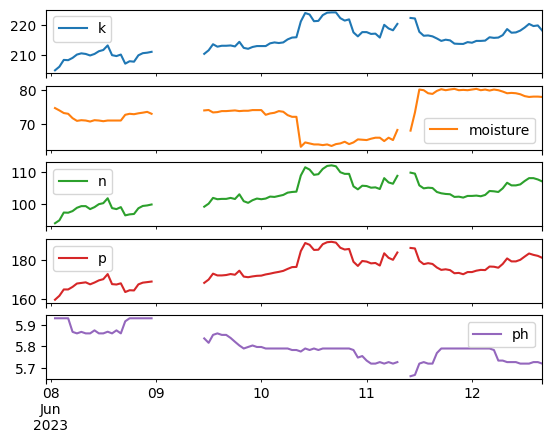

<Figure size 800x2400 with 0 Axes>

In [20]:
import pandas as pd

# Menghitung jumlah baris untuk masing-masing proporsi
proporsi_1 = 0.64
proporsi_2 = 0.1
total_baris = len(df)
jumlah_baris_1 = int(total_baris * proporsi_1)

# Memisahkan DataFrame
df1 = df[:jumlah_baris_1]  
df2 = df[jumlah_baris_1:]

import matplotlib.pyplot as plt
df2.plot(subplots=True)
fig = plt.figure(figsize=(8, 24)) 
plt.show()

In [ ]:
#Hitung rata rata pergerakan bergerak
rolling_mois = df2['moisture'].rolling(window=3, min_periods=1, center=True).mean()
rolling_k = df2['k'].rolling(window=3, min_periods=1, center=True).mean()
rolling_n = df2['n'].rolling(window=3, min_periods=1, center=True).mean()
rolling_p = df2['p'].rolling(window=3, min_periods=1, center=True).mean()
rolling_ph = df2['ph'].rolling(window=3, min_periods=1, center=True).mean()

# Isi nilai NaN dengan nilai rata-rata
df2['moisture'] = df2['moisture'].fillna(rolling_mois)
df2['k'] = df2['k'].fillna(rolling_k)
df2['n'] = df2['n'].fillna(rolling_n)
df2['p'] = df2['p'].fillna(rolling_p)
df2['ph'] = df2['ph'].fillna(rolling_ph)
df_filled = df2.fillna(method='ffill')

#print(df_filled)

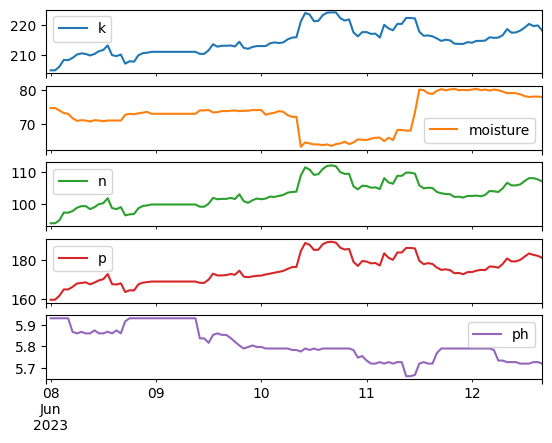

<Figure size 800x2400 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
df_filled.plot(subplots=True)
fig = plt.figure(figsize=(8, 24)) 
plt.show()

# Pengujian Algoritma Machine Learning

# Simple RNN

In [23]:
import pandas as pd

# Menghitung jumlah baris untuk masing-masing proporsi
proporsi_1 = 0.7
proporsi_2 = 0.1
total_baris = len(df_filled)
jumlah_baris_1 = int(total_baris * proporsi_1)

# Memisahkan DataFrame
df1 = df_filled[:jumlah_baris_1]  
df2 = df_filled[jumlah_baris_1:]

#print(df1)

In [24]:
# Menghapus baris yang mengandung NaN pada kolom 'col1'
df1 = df1.dropna(subset=['moisture'])

In [25]:
df_aktual = df2
df_dataset = df1

In [26]:
y_act = df_aktual ['moisture']

In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_dataset['normalized_value'] = scaler.fit_transform(df_dataset['moisture'].values.reshape(-1, 1))  # Ganti 'value' dengan kolom nilai yang ingin Anda normalisasi

In [29]:
train_size = int(0.8 * len(df_dataset)) 
train_data = df_dataset.iloc[:train_size]
test_data = df_dataset.iloc[train_size:]

In [30]:
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [31]:
time_steps = 3
X_train, y_train = create_sequences(train_data['normalized_value'], train_data['normalized_value'], time_steps)
X_test, y_test = create_sequences(test_data['normalized_value'], test_data['normalized_value'], time_steps)

In [34]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense


# Input layer
inputs = Input(shape=(10, 1))

# RNN layer
rnn = SimpleRNN(units=32, activation='relu')(inputs)

# Output layer
outputs = Dense(units=10)(rnn)

# Membuat model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melakukan training
model.fit(X_train.reshape(0, 0, 1), y_train, epochs=100)

# Contoh data testing
X_test = np.array([[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

# Melakukan prediksi
predictions = model.predict(X_test.reshape(1, 10, 1))
print(predictions)

ValueError: ignored

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Langkah 2: Membangun model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], X_train.shape[1])))
#X_train.shape[1] adalah jumlah langkah waktu, X_train.shape[1] adalah jumlah fitur

#model.add(Dense(units=64, activation='relu'))
# Menambahkan layer output
model.add(Dense(units=1))  # Contoh: output adalah 1 unit untuk regresi
# Tampilkan ringkasan model
model.summary()

In [88]:
X_train = np.expand_dims(X_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)

In [90]:
model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train, epochs=1, batch_size=1)

ValueError: ignored

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(time_steps, 1)))  # 64 adalah jumlah unit LSTM, 1 adalah dimensi fitur
model.add(Dense(1))  # Keluaran tunggal
#epochs=12, batch_size=16
model.compile(optimizer='adam', loss='mean_squared_error')  # Anda dapat memilih optimizer dan fungsi kerugian yang sesuai
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1) # Anda dapat menyesuaikan parameter pelatihan sesuai kebutuhan

# ARIMA

In [245]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

# Menghitung jumlah baris untuk masing-masing proporsi
proporsi_1 = 0.7
proporsi_2 = 0.1
total_baris = len(df_filled)
jumlah_baris_1 = int(total_baris * proporsi_1)

# Memisahkan DataFrame
df1 = df_filled[:jumlah_baris_1]  
df2 = df_filled[jumlah_baris_1:]

#print(df1)

In [298]:
# Menghapus baris yang mengandung NaN pada kolom 'col1'
df1 = df1.dropna(subset=['moisture'])

In [299]:
df_aktual = df2
df_dataset = df1

In [300]:
y_act = df_aktual ['moisture']

In [317]:
import pandas as pd

# Menghitung jumlah baris untuk masing-masing proporsi
proporsi_1 = 0.4
proporsi_2 = 0.1
total_baris = len(y_act)
jumlah_baris_1 = int(total_baris * proporsi_1)

# Memisahkan DataFrame
a = y_act[:jumlah_baris_1]  
b = y_act[jumlah_baris_1:]

In [319]:
y_act= a

In [320]:
# Menghilangkan kolom index dan mengubahnya menjadi series
y_act = y_act.reset_index(drop=True).squeeze()

In [302]:
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

model = pm.auto_arima(df_dataset, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=391.173, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=358.539, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=389.173, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=352.412, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=326.552, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=328.419, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=328.438, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=340.606, Time=0.09 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=330.352, Time=0.38 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=325.340, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=350.807, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=327.243, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=327.259, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=339.527, 

In [303]:
from statsmodels.tsa.arima.model import ARIMA
# Langkah 2: Tentukan parameter ARIMA
p = model.get_params()['order'][0]
d = model.get_params()['order'][1]
q = model.get_params()['order'][2]
print(p,d,q)

3 2 0


In [304]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Langkah 1: Persiapkan data
data_historis = df_dataset

# Langkah 3: Latih model ARIMA
model = ARIMA(data_historis, order=(p, d, q))
model_fit = model.fit()

# Langkah 4: Prediksi nilai di masa depan
prediksi = model_fit.forecast(steps=12)
# Menghitung RMSE
#mse = mean_squared_error(y_act, prediksi)
#rmse = np.sqrt(mse)
#print(mse)
#print(rmse)
#print(prediksi)

In [305]:
# Menghilangkan kolom index dan mengubahnya menjadi series
prediksi = prediksi.reset_index(drop=True).squeeze()

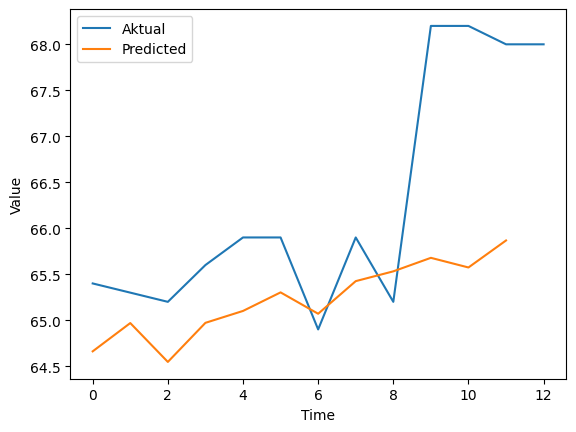

<Figure size 400x1800 with 0 Axes>

In [321]:
# Menampilkan data prediksi pada grafik
plt.plot(y_act, label='Aktual')
# Menampilkan data prediksi pada grafik
plt.plot(prediksi, label='Predicted')

# Menampilkan label sumbu dan legenda
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
fig = plt.figure(figsize=(4, 18))  # Misalnya, ukuran 8x6 inci
# Menampilkan grafik
plt.show()

# RNN LTSM

In [123]:
columns_to_drop = ['n', 'p', 'k', 'ph']
df_filled = df_filled.drop(columns=columns_to_drop)

In [224]:
import pandas as pd

# Menghitung jumlah baris untuk masing-masing proporsi
proporsi_1 = 0.9
proporsi_2 = 0.1
total_baris = len(df_filled)
jumlah_baris_1 = int(total_baris * proporsi_1)

# Memisahkan DataFrame
df1 = df_filled[:jumlah_baris_1]  
df2 = df_filled[jumlah_baris_1:]

print(df1)

                      moisture
2023-06-07 17:00:00        NaN
2023-06-07 18:00:00  51.500000
2023-06-07 19:00:00  51.500000
2023-06-07 20:00:00  67.000000
2023-06-07 21:00:00  67.000000
...                        ...
2023-06-11 15:00:00  78.900000
2023-06-11 16:00:00  79.800000
2023-06-11 17:00:00  80.300000
2023-06-11 18:00:00  80.000000
2023-06-11 19:00:00  80.222222

[99 rows x 1 columns]


In [225]:
# Menghapus baris yang mengandung NaN pada kolom 'col1'
df1 = df1.dropna(subset=['moisture'])

In [226]:
df_aktual = df2
df_dataset = df1

In [227]:
y_act = df_aktual ['moisture']

In [228]:
# Menghilangkan kolom index dan mengubahnya menjadi series
y_act = y_act.reset_index(drop=True).squeeze()

In [229]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [230]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_dataset['normalized_value'] = scaler.fit_transform(df_dataset['moisture'].values.reshape(-1, 1))  # Ganti 'value' dengan kolom nilai yang ingin Anda normalisasi

In [231]:
train_size = int(0.8 * len(df_dataset)) 
train_data = df_dataset.iloc[:train_size]
test_data = df_dataset.iloc[train_size:]

In [232]:
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [233]:
time_steps = 15  # Jumlah timestep yang akan digunakan oleh LSTM

X_train, y_train = create_sequences(train_data['normalized_value'], train_data['normalized_value'], time_steps)
X_test, y_test = create_sequences(test_data['normalized_value'], test_data['normalized_value'], time_steps)

In [234]:
model = Sequential()
model.add(LSTM(256, input_shape=(time_steps, 1)))  # 64 adalah jumlah unit LSTM, 1 adalah dimensi fitur
model.add(Dense(1))  # Keluaran tunggal
#epochs=12, batch_size=16
model.compile(optimizer='adam', loss='mean_squared_error')  # Anda dapat memilih optimizer dan fungsi kerugian yang sesuai
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1) # Anda dapat menyesuaikan parameter pelatihan sesuai kebutuhan

Epoch 1/10
63/63 [==============================] - 4s 18ms/step - loss: 0.0246
Epoch 2/10
63/63 [==============================] - 2s 36ms/step - loss: 0.0076
Epoch 3/10
63/63 [==============================] - 2s 34ms/step - loss: 0.0083
Epoch 4/10
63/63 [==============================] - 1s 19ms/step - loss: 0.0082
Epoch 5/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0062
Epoch 6/10
63/63 [==============================] - 1s 18ms/step - loss: 0.0047
Epoch 7/10
63/63 [==============================] - 2s 28ms/step - loss: 0.0043
Epoch 8/10
63/63 [==============================] - 2s 33ms/step - loss: 0.0042
Epoch 9/10
63/63 [==============================] - 2s 32ms/step - loss: 0.0044
Epoch 10/10
63/63 [==============================] - 2s 26ms/step - loss: 0.0037


In [235]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0039
Test Loss: 0.0017


In [242]:
future_time_steps = 1 # Jumlah timestep di masa depan yang ingin Anda prediksi

future_data = df_dataset.iloc[-time_steps:]  # Mengambil data terakhir sebagai masukan awal

X_future, _ = create_sequences(future_data['normalized_value'], future_data['normalized_value'], future_time_steps)
future_predictions1 = model.predict(X_future)

future_time_steps = 13 # Jumlah timestep di masa depan yang ingin Anda prediksi

future_data = df_dataset.iloc[-time_steps:]  # Mengambil data terakhir sebagai masukan awal

X_future, _ = create_sequences(future_data['normalized_value'], future_data['normalized_value'], future_time_steps)
future_predictions = model.predict(X_future)

future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))  # Mengembalikan nilai ke skala asli
print(future_predictions)

1/1 [==============================] - 0s 27ms/step
[[78.412224]
 [77.74521 ]]


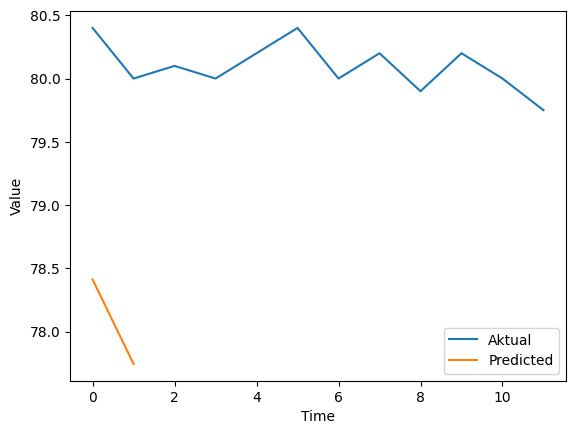

<Figure size 400x1800 with 0 Axes>

In [243]:
# Menampilkan data prediksi pada grafik
plt.plot(y_act, label='Aktual')
# Menampilkan data prediksi pada grafik
plt.plot(future_predictions, label='Predicted')

# Menampilkan label sumbu dan legenda
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
fig = plt.figure(figsize=(4, 18))  # Misalnya, ukuran 8x6 inci
# Menampilkan grafik
plt.show()